#Weekly Counts of Deaths by State and Select Causes, 2014-2018

Final counts of deaths by the week the deaths occurred, by state of occurrence, and by select causes of death for 2014-2018. The dataset contains 14094 records and 30 columns. 

- In addition to the State and the Week, Week ending date is also provided - this is redundant data and either Week or Week ending date should be dropped.
- Each cause of death column has count columb (integer) and matching "flag" column that has value if the numbers were in a range from 1 to 9 and therefore suppresed.

Death counts in this dataset were derived from the National Vital Statistics System database that provides the most timely access to the data. Therefore, counts may differ slightly from final data due to differences in processing, recoding, and imputation.

Source: https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-State-and-Select-Causes/3yf8-kanr

### I would like to research tendencies for the "Influenza and pneumonia (J10-J18)" cause of death. Possibly see what states at what time of the year have higher numbers.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
from urllib.request import urlretrieve
hypertable=[]

In [2]:
#Database URL
url = 'https://data.cdc.gov/api/views/3yf8-kanr/rows.csv'
df = pd.read_csv(url)
df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke
0,Alabama,2014,1,01/04/2014,355,327,NaN,60.0,NaN,10.0,...,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
1,Alabama,2014,2,01/11/2014,872,792,23.0,163.0,23.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2014,3,01/18/2014,1044,971,21.0,209.0,34.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2014,4,01/25/2014,1022,967,25.0,205.0,23.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2014,5,02/01/2014,1040,953,18.0,200.0,26.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print('df shape: ', df.shape)
df.describe().T

df shape:  (14094, 30)


,count,mean,std,min,25%,50%,75%,max
MMWR Year,14094.0,2015.992337,1.416950,2014.0,2015.0,2016.0,2017.00,2018.0
MMWR Week,14094.0,26.601533,15.069286,1.0,14.0,27.0,40.00,53.0
All Cause,14094.0,1958.513197,7045.593511,50.0,309.0,780.0,1287.00,67664.0
Natural Cause,14094.0,1794.083156,6456.339032,43.0,276.0,709.0,1182.75,62704.0
Septicemia (A40-A41),7947.0,48.090726,135.598314,0.0,13.0,20.0,32.00,1067.0
Malignant neoplasms (C00-C97),14084.0,425.051122,1527.189508,10.0,63.0,165.0,278.00,12433.0
Diabetes mellitus (E10-E14),10548.0,76.507300,237.803654,0.0,20.0,30.0,48.00,2113.0
Alzheimer disease (G30),11272.0,99.396380,324.017824,0.0,22.0,38.0,62.00,3212.0
Influenza and pneumonia (J10-J18),9088.0,59.098702,189.145124,0.0,14.0,22.0,39.00,2939.0
Chronic lower respiratory diseases (J40-J47),12194.0,126.678940,428.392662,0.0,28.0,49.0,85.00,4382.0


In [4]:
df.columns

Index(['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All  Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J10-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)', 'flag_allcause', 'flag_natcause',
       'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz', 'flag_inflpn',
       'flag_clrd', 'flag_otherresp', 'flag_nephr', 'flag_otherunk', 'flag_hd',
       'flag_stroke'],
      dtype='object')

In [5]:
#Rename Columns 
df.columns = ['State', 'Year', 'Week',
       'WeekEndDate', 'All_Cause', 'Nat_Cause',
       'Septicemia', 'Cancer',
       'Diabetes', 'Alzheimer',
       'InflPn',
       'COPD',
       'Respiratory',
       'Kidney',
       'Other',
       'Heart',
       'Stroke', 'flag_allcause', 'flag_natcause',
       'flag_sept', 'flag_cancer', 'flag_diab', 'flag_alz', 'flag_inflpn',
       'flag_clrd', 'flag_respiratory', 'flag_kidney', 'flag_other', 'flag_heart',
       'flag_stroke']

In [6]:
df.columns
df.head()

,State,Year,Week,WeekEndDate,All_Cause,Nat_Cause,Septicemia,Cancer,Diabetes,Alzheimer,...,flag_cancer,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_respiratory,flag_kidney,flag_other,flag_heart,flag_stroke
0,Alabama,2014,1,01/04/2014,355,327,NaN,60.0,NaN,10.0,...,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
1,Alabama,2014,2,01/11/2014,872,792,23.0,163.0,23.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2014,3,01/18/2014,1044,971,21.0,209.0,34.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2014,4,01/25/2014,1022,967,25.0,205.0,23.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2014,5,02/01/2014,1040,953,18.0,200.0,26.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Remove United States from the list of states
df=df[~(df['State']=='United States')]
df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'New York City',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [8]:
#df['State'].astype('str').dtypes
df['State']=df['State'].convert_dtypes()
df['State'].dtype


StringDtype

In [9]:
df['WeekEndDate']=pd.to_datetime(df['WeekEndDate'])
df['WeekEndDate'].dtypes

dtype('<M8[ns]')

In [10]:
df.head()

,State,Year,Week,WeekEndDate,All_Cause,Nat_Cause,Septicemia,Cancer,Diabetes,Alzheimer,...,flag_cancer,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_respiratory,flag_kidney,flag_other,flag_heart,flag_stroke
0,Alabama,2014,1,2014-01-04,355,327,NaN,60.0,NaN,10.0,...,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
1,Alabama,2014,2,2014-01-11,872,792,23.0,163.0,23.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2014,3,2014-01-18,1044,971,21.0,209.0,34.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2014,4,2014-01-25,1022,967,25.0,205.0,23.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2014,5,2014-02-01,1040,953,18.0,200.0,26.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.convert_dtypes()
df.dtypes

State                       string
Year                         int64
Week                         int64
WeekEndDate         datetime64[ns]
All_Cause                    int64
Nat_Cause                    int64
Septicemia                 float64
Cancer                     float64
Diabetes                   float64
Alzheimer                  float64
InflPn                     float64
COPD                       float64
Respiratory                float64
Kidney                     float64
Other                      float64
Heart                      float64
Stroke                     float64
flag_allcause              float64
flag_natcause              float64
flag_sept                   object
flag_cancer                 object
flag_diab                   object
flag_alz                    object
flag_inflpn                 object
flag_clrd                   object
flag_respiratory            object
flag_kidney                 object
flag_other                  object
flag_heart          

In [12]:
df['flag_allcause'].unique()

array([nan])

In [13]:
df['All_Cause'].isnull().sum()

0

In [14]:
df.drop(['flag_allcause'],axis=1, inplace=True)

In [15]:
df['Nat_Cause'].isnull().sum()

0

In [16]:
df['flag_natcause'].unique()

array([nan])

In [17]:
df.drop(['flag_natcause'],axis=1, inplace=True)

In [18]:
df['Septicemia'].isnull().sum()

6147

In [19]:
df['flag_sept'].fillna(0,inplace=True)
df['flag_sept'].replace('Suppressed (counts 1-9)',1,inplace=True)

In [20]:
df['Septicemia'].fillna(5,inplace=True)
df['Septicemia'].isnull().sum()

0

In [21]:
df['Cancer'].fillna(5,inplace=True)

In [22]:
df['flag_cancer'].fillna(0,inplace=True)
df['flag_diab'].fillna(0,inplace=True)
df['flag_alz'].fillna(0,inplace=True)
df['flag_inflpn'].fillna(0,inplace=True)
df['flag_clrd'].fillna(0,inplace=True)
df['flag_respiratory'].fillna(0,inplace=True)
df['flag_kidney'].fillna(0,inplace=True)
df['flag_other'].fillna(0,inplace=True)
df['flag_heart'].fillna(0,inplace=True)
df['flag_stroke'].fillna(0,inplace=True)
#'cancer_counts_suppressed'
df['flag_cancer'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['flag_diab'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['flag_alz'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['flag_inflpn'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['flag_clrd'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['flag_respiratory'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['flag_kidney'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['flag_other'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['flag_heart'].replace('Suppressed (counts 1-9)',1,inplace=True)
df['flag_stroke'].replace('Suppressed (counts 1-9)',1,inplace=True)

In [23]:
df['Diabetes'].fillna(5,inplace=True)
df['Alzheimer'].fillna(5,inplace=True)
df['InflPn'].fillna(5,inplace=True)
df['COPD'].fillna(5,inplace=True)
df['Respiratory'].fillna(5,inplace=True)
df['Kidney'].fillna(5,inplace=True)
df['Other'].fillna(5,inplace=True)
df['Heart'].fillna(5,inplace=True)
df['Stroke'].fillna(5,inplace=True)

df.isnull().sum()

State               0
Year                0
Week                0
WeekEndDate         0
All_Cause           0
Nat_Cause           0
Septicemia          0
Cancer              0
Diabetes            0
Alzheimer           0
InflPn              0
COPD                0
Respiratory         0
Kidney              0
Other               0
Heart               0
Stroke              0
flag_sept           0
flag_cancer         0
flag_diab           0
flag_alz            0
flag_inflpn         0
flag_clrd           0
flag_respiratory    0
flag_kidney         0
flag_other          0
flag_heart          0
flag_stroke         0
dtype: int64

In [24]:
df.dtypes

State                       string
Year                         int64
Week                         int64
WeekEndDate         datetime64[ns]
All_Cause                    int64
Nat_Cause                    int64
Septicemia                 float64
Cancer                     float64
Diabetes                   float64
Alzheimer                  float64
InflPn                     float64
COPD                       float64
Respiratory                float64
Kidney                     float64
Other                      float64
Heart                      float64
Stroke                     float64
flag_sept                    int64
flag_cancer                  int64
flag_diab                    int64
flag_alz                     int64
flag_inflpn                  int64
flag_clrd                    int64
flag_respiratory             int64
flag_kidney                  int64
flag_other                   int64
flag_heart                   int64
flag_stroke                  int64
dtype: object

In [25]:
df['Month']=df['WeekEndDate'].dt.month

In [26]:
def season (wkdate):
    if   wkdate >= datetime.date(wkdate.year,3,20) and wkdate < datetime.date(wkdate.year,6,21):
        return 'Spring'
    elif wkdate >= datetime.date(wkdate.year,6,21) and wkdate < datetime.date(wkdate.year,9,22):
        return 'Summer'
    elif wkdate >= datetime.date(wkdate.year,9,22) and wkdate < datetime.date(wkdate.year,12,21):
        return 'Fall'
    else :
        return 'Winter'

In [27]:
#Create four categorical columns for the seasons
df['Spring'] = 0
df['Summer'] = 0
df['Fall'] = 0
df['Winter'] = 0

df['Winter'] = (df['WeekEndDate'].apply(season) == 'Winter').astype('int32')
df['Spring'] = (df['WeekEndDate'].apply(season) == 'Spring').astype('int32')
df['Summer'] = (df['WeekEndDate'].apply(season) == 'Summer').astype('int32')
df['Fall'] = (df['WeekEndDate'].apply(season) == 'Fall').astype('int32')


In [28]:
#Number of Weeks in each year
noweeks=df.set_index(['State','Year','Week'],drop=False)['Week'].max(level=1).to_dict()
noweeks[2014]

53

In [29]:
#Calculate Next Week function
def nextWeek(year,week):
    try:
        maxweek = noweeks[year-1]
    except:
        maxweek = 52
    if week == 1:
        year -= 1
        week = maxweek
    else:
        week -=1
    return [year,week]
    

In [30]:
#Add next week columns to the dataframe

nextweeks=df.apply(lambda x: nextWeek(x['Year'], x['Week']), axis=1)
tmp=pd.DataFrame.from_dict(dict(zip(nextweeks.index, nextweeks.values))).T
tmp.columns = ['nxtWkYear','nxtWeek']
df=pd.concat([df,tmp],axis=1)


In [31]:
#shift the dataset 
#make sure that states don't overlap

df2=pd.DataFrame(df[['State','nxtWkYear','nxtWeek','InflPn','flag_inflpn']])
df2.columns = ['State','nxtWkYear','nxtWeek','nxtInflPn','nxtflag_inflpn']
df=df.merge(df2,left_on=['State','Year','Week'],right_on=['State','nxtWkYear','nxtWeek']).drop(['nxtWkYear_x','nxtWeek_x','nxtWkYear_y','nxtWeek_y'],axis=1)




In [32]:
#df[['State', 'Year', 'Week','InflPn','nxtInflPn']][(df['Week']>=50) & (df['Year']==2018)].tail(20)
#df[['State', 'Year', 'Week','InflPn','nxtInflPn']][df['Year']==2018]
#df['Week'][df['Year']==2018].max()
df[['State', 'Year', 'Week','InflPn','nxtInflPn']][df['State']=='Pennsylvania']


,State,Year,Week,InflPn,nxtInflPn
10140,Pennsylvania,2014,1,33.0,65.0
10141,Pennsylvania,2014,2,65.0,63.0
10142,Pennsylvania,2014,3,63.0,73.0
10143,Pennsylvania,2014,4,73.0,71.0
10144,Pennsylvania,2014,5,71.0,84.0
...,...,...,...,...,...
10395,Pennsylvania,2018,47,49.0,66.0
10396,Pennsylvania,2018,48,66.0,51.0
10397,Pennsylvania,2018,49,51.0,46.0
10398,Pennsylvania,2018,50,46.0,51.0


In [ ]:
#drop last week of 2018 for all states


In [33]:
#Create dummy variables for state. Add the dummies back to the dataframe and remove the original column for state.
df = pd.concat([df.drop(['State'], axis=1), pd.get_dummies(df['State'])], axis=1)

In [34]:
df.columns

Index(['Year', 'Week', 'WeekEndDate', 'All_Cause', 'Nat_Cause', 'Septicemia',
       'Cancer', 'Diabetes', 'Alzheimer', 'InflPn', 'COPD', 'Respiratory',
       'Kidney', 'Other', 'Heart', 'Stroke', 'flag_sept', 'flag_cancer',
       'flag_diab', 'flag_alz', 'flag_inflpn', 'flag_clrd', 'flag_respiratory',
       'flag_kidney', 'flag_other', 'flag_heart', 'flag_stroke', 'Month',
       'Spring', 'Summer', 'Fall', 'Winter', 'nxtInflPn', 'nxtflag_inflpn',
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon',

In [ ]:
#train set split
# for the last 3-4 weeks

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
hypertablerow={}
model = LinearRegression()
hypertablerow['model']=model.__class__.__name__
hypertablerow['features']=['Month', 'Week','Year','Fall','Winter','Spring','Summer']
hypertablerow['dropped isna columns']=True
X = df[hypertablerow['features']]
y = df[['nxtInflPn']]
model.fit(X,y)
hypertablerow['training score']=model.score(X,y)
hypertable.append(hypertablerow)
pd.Series(hypertablerow)

model                                                    LinearRegression
features                [Month, Week, Year, Fall, Winter, Spring, Summer]
dropped isna columns                                                 True
training score                                                  0.0679691
dtype: object

In [41]:
hypertablerow={}
model = LinearRegression()
hypertablerow['model']=model.__class__.__name__
hypertablerow['features']=['Month', 'Week','Year','Fall','Winter','Spring','Summer','InflPn']
hypertablerow['dropped isna columns']=True
X = df[hypertablerow['features']]
y = df[['nxtInflPn']]
model.fit(X,y)
hypertablerow['training score']=model.score(X,y)
hypertable.append(hypertablerow)
pd.Series(hypertablerow)

model                                                    LinearRegression
features                [Month, Week, Year, Fall, Winter, Spring, Summ...
dropped isna columns                                                 True
training score                                                   0.906391
dtype: object

In [42]:
pd.DataFrame(hypertable)
#add test set score

,model,features,dropped isna columns,training score
0,LinearRegression,"[Month, Week, Year, Fall, Winter, Spring, Summer]",True,0.067969
1,LinearRegression,"[Month, Week, Year, Fall, Winter, Spring, Summ...",True,1.000000
2,LinearRegression,"[Month, Week, Year, Fall, Winter, Spring, Summ...",True,0.906391


In [38]:
df[['WeekEndDate','nxtInflPn']].describe()

,nxtInflPn
count,13780.000000
mean,20.520174
std,24.320067
min,0.000000
25%,5.000000
50%,13.000000
75%,27.000000
max,460.000000


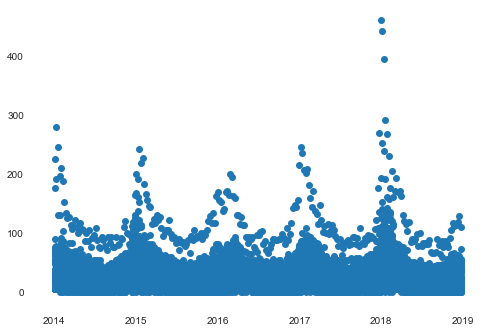

In [39]:
plt.plot_date(df['WeekEndDate'], df['nxtInflPn'])

In [40]:
#shift the dataset 
#make sure that states don't overlap